 Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical


Load Dataset

In [5]:
df = pd.read_csv("/content/twitter_training.csv")

In [6]:
df.columns = ["ID", "Category", "Sentiment", "Tweet"]

Select Features and Labels

In [7]:
X = df.iloc[:, 3].astype(str).values
y = df.iloc[:, 2].values

Encode labels

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Tokenization and Padding

In [11]:
max_words = 10000     # Vocabulary size
max_len = 100         # Max length of tweet (truncate/pad)

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")


Build CNN Model

In [27]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation="tanh"),
    GlobalMaxPooling1D(),
    Dense(64, activation="tanh"),
    Dropout(0.5),
    Dense(y.shape[1], activation="sigmoid")  # output layer
])

In [28]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Train Model

In [29]:
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=13,
    batch_size=128,
    verbose=1
)

Epoch 1/13
290/290 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4598 - loss: 1.1973 - val_accuracy: 0.7734 - val_loss: 0.6240
Epoch 2/13
290/290 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8709 - loss: 0.3921 - val_accuracy: 0.8659 - val_loss: 0.3843
Epoch 3/13
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9449 - loss: 0.1749 - val_accuracy: 0.8930 - val_loss: 0.3123
Epoch 4/13
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9595 - loss: 0.1176 - val_accuracy: 0.8938 - val_loss: 0.3126
Epoch 5/13
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9648 - loss: 0.0990 - val_accuracy: 0.8978 - val_loss: 0.3065
Epoch 6/13
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9644 - loss: 0.0954 - val_accuracy: 0.9014 - val_loss: 0.3007
Epoch 7/13
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9657 - loss: 0.0941 - val_accuracy: 0.9040 - val_loss: 0.3018
Epoch 8/13
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9655 - loss: 0.0870 - val_accuracy: 0

 Evaluate Model

In [30]:
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\n✅ CNN Test Accuracy: {accuracy * 100:.2f}%")



✅ CNN Test Accuracy: 90.34%


In [16]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Accuracy Plot

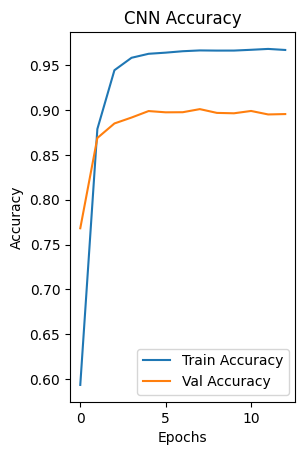

In [17]:
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Loss Plot

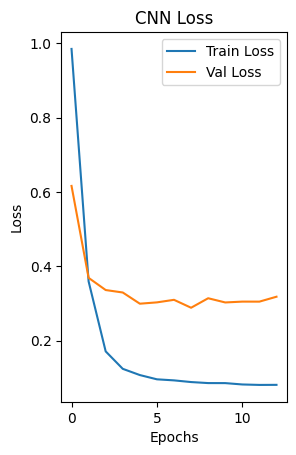

In [18]:
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()